# Recomendação de Atividades Físicas através da Alimentação

- O Athletic Fit é um programa de recomendação de atividades físicas com base na alimentação diária das pessoas.
- Ele sugere atividades físicas para gastar a quantidade de calorias que são ingeridas no dia e que geralmente são 
  acumuladas por pessoas sedentárias.

## Tabela nutricional de Alimentos

- O projeto TACO(Tabela Brasileira de Composição de Alimentos) é uma iniciativa do Núcleo de Estudos e Pesquisas em Alimentos(NEPA) da UNICAMP, com financiamento do Ministério da Saúde (MS) e Ministério do Desenvolvimento Social e Combate à Fome (MDS). Ele fornece dados de um grande número de nutrientes em alimentos nacionais e regionais, obtidos por meio de amostragem representativa e análises realizadas por laboratórios com competência analítica comprovada por estudos interlaboratoriais, segundo critérios internacionais.

    **Site:** http://www.nepa.unicamp.br/taco/home.php?ativo=home

In [1]:
import pandas as pd
import requests
import missingno as msno

C:\Users\liare\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
response = requests.get('https://taco-food-api.herokuapp.com/api/v1/food')
# Disponibilizar o conteúdo da API para iniciar a análise.

In [3]:
response

<Response [200]>

In [4]:
response.text

'[{"id":1,"description":"Arroz, integral, cozido","base_qty":100,"base_unit":"g","category_id":1,"attributes":{"humidity":{"qty":70.1386666666667,"unit":"percents"},"protein":{"qty":2.58825,"unit":"g"},"lipid":{"qty":1.00033333333333,"unit":"g"},"cholesterol":{"qty":"NA","unit":"mg"},"carbohydrate":{"qty":25.80975,"unit":"g"},"fiber":{"qty":2.74933333333333,"unit":"g"},"ashes":{"qty":0.463,"unit":"g"},"calcium":{"qty":5.204,"unit":"mg"},"magnesium":{"qty":58.702,"unit":"mg"},"phosphorus":{"qty":105.853,"unit":"mg"},"iron":{"qty":0.262,"unit":"mg"},"sodium":{"qty":1.24466666666667,"unit":"mg"},"potassium":{"qty":75.1516666666667,"unit":"mg"},"copper":{"qty":0.020333333333333,"unit":"mg"},"zinc":{"qty":0.682666666666667,"unit":"mg"},"retinol":{"qty":"NA","unit":"mcg"},"thiamine":{"qty":0.08,"unit":"mg"},"riboflavin":{"qty":"Tr","unit":"mg"},"pyridoxine":{"qty":0.08,"unit":"mg"},"niacin":{"qty":"Tr","unit":"mg"},"energy":{"kcal":123.5348925,"kj":516.86999022},"fatty_acids":{"saturated":{"

In [5]:
response.json()

[{'id': 1,
  'description': 'Arroz, integral, cozido',
  'base_qty': 100,
  'base_unit': 'g',
  'category_id': 1,
  'attributes': {'humidity': {'qty': 70.1386666666667, 'unit': 'percents'},
   'protein': {'qty': 2.58825, 'unit': 'g'},
   'lipid': {'qty': 1.00033333333333, 'unit': 'g'},
   'cholesterol': {'qty': 'NA', 'unit': 'mg'},
   'carbohydrate': {'qty': 25.80975, 'unit': 'g'},
   'fiber': {'qty': 2.74933333333333, 'unit': 'g'},
   'ashes': {'qty': 0.463, 'unit': 'g'},
   'calcium': {'qty': 5.204, 'unit': 'mg'},
   'magnesium': {'qty': 58.702, 'unit': 'mg'},
   'phosphorus': {'qty': 105.853, 'unit': 'mg'},
   'iron': {'qty': 0.262, 'unit': 'mg'},
   'sodium': {'qty': 1.24466666666667, 'unit': 'mg'},
   'potassium': {'qty': 75.1516666666667, 'unit': 'mg'},
   'copper': {'qty': 0.020333333333333, 'unit': 'mg'},
   'zinc': {'qty': 0.682666666666667, 'unit': 'mg'},
   'retinol': {'qty': 'NA', 'unit': 'mcg'},
   'thiamine': {'qty': 0.08, 'unit': 'mg'},
   'riboflavin': {'qty': 'Tr', 'un

In [6]:
nutri = response.json()
# O arquivo json foi salvo na variável nutri.

In [7]:
nutri_kcal = pd.DataFrame(nutri)
nutri_kcal.head(10)
# Transformação do arquivo json no dataset data_nutri.

,id,description,base_qty,base_unit,category_id,attributes,vitaminC,re,rae
0,1,"Arroz, integral, cozido",100,g,1,"{'humidity': {'qty': 70.1386666666667, 'unit':...",NaN,NaN,NaN
1,2,"Arroz, integral, cru",100,g,1,"{'humidity': {'qty': 12.1798333333333, 'unit':...",NaN,NaN,NaN
2,3,"Arroz, tipo 1, cozido",100,g,1,"{'humidity': {'qty': 69.1136666666667, 'unit':...",NaN,NaN,NaN
3,4,"Arroz, tipo 1, cru",100,g,1,"{'humidity': {'qty': 13.2245, 'unit': 'percent...",NaN,NaN,NaN
4,5,"Arroz, tipo 2, cozido",100,g,1,"{'humidity': {'qty': 68.7276666666667, 'unit':...",NaN,NaN,NaN
5,6,"Arroz, tipo 2, cru",100,g,1,"{'humidity': {'qty': 13.16475, 'unit': 'percen...",NaN,NaN,NaN
6,7,"Aveia, flocos, crua",100,g,1,"{'humidity': {'qty': 9.13333333333333, 'unit':...","{'qty': 1.35, 'unit': 'mg'}",NaN,NaN
7,8,"Biscoito, doce, maisena",100,g,1,"{'humidity': {'qty': 3.21666666666667, 'unit':...","{'qty': 6.21666666666667, 'unit': 'mg'}",NaN,NaN
8,9,"Biscoito, doce, recheado com chocolate",100,g,1,"{'humidity': {'qty': 2.18333333333333, 'unit':...","{'qty': 3.52666666666667, 'unit': 'mg'}",NaN,NaN
9,10,"Biscoito, doce, recheado com morango",100,g,1,"{'humidity': {'qty': 2.73333333333333, 'unit':...","{'qty': 'Tr', 'unit': 'mg'}",NaN,NaN


In [8]:
nutri_kcal.shape
# Análise geral do dataset e a coluna attributes contém um dicionário de informações.

(597, 9)

In [9]:
nutri_kcal = pd.io.json.json_normalize(nutri)
# Normalizar as colunas utilizando o normalize.

C:\Users\liare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [10]:
nutri_kcal.columns

Index(['id', 'description', 'base_qty', 'base_unit', 'category_id',
       'attributes.humidity.qty', 'attributes.humidity.unit',
       'attributes.protein.qty', 'attributes.protein.unit',
       'attributes.lipid.qty',
       ...
       'attributes.amino_acids.glutamic.qty',
       'attributes.amino_acids.glutamic.unit',
       'attributes.amino_acids.glycine.qty',
       'attributes.amino_acids.glycine.unit',
       'attributes.amino_acids.proline.qty',
       'attributes.amino_acids.proline.unit',
       'attributes.amino_acids.serine.qty',
       'attributes.amino_acids.serine.unit', 'attributes.fatty_acids.22:6.qty',
       'attributes.fatty_acids.22:6.unit'],
      dtype='object', length=135)

In [11]:
pd.__version__

'1.1.5'

In [12]:
pd.io.json.json_normalize(nutri)

C:\Users\liare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,description,base_qty,base_unit,category_id,attributes.humidity.qty,attributes.humidity.unit,attributes.protein.qty,attributes.protein.unit,attributes.lipid.qty,...,attributes.amino_acids.glutamic.qty,attributes.amino_acids.glutamic.unit,attributes.amino_acids.glycine.qty,attributes.amino_acids.glycine.unit,attributes.amino_acids.proline.qty,attributes.amino_acids.proline.unit,attributes.amino_acids.serine.qty,attributes.amino_acids.serine.unit,attributes.fatty_acids.22:6.qty,attributes.fatty_acids.22:6.unit
0,1,"Arroz, integral, cozido",100,g,1,70.1387,percents,2.58825,g,1.00033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Arroz, integral, cru",100,g,1,12.1798,percents,7.32329,g,1.86483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Arroz, tipo 1, cozido",100,g,1,69.1137,percents,2.52082,g,0.227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"Arroz, tipo 1, cru",100,g,1,13.2245,percents,7.15854,g,0.335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Arroz, tipo 2, cozido",100,g,1,68.7277,percents,2.56842,g,0.361667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,593,"Gergelim, semente",100,g,15,3.85933,percents,21.1647,g,50.4327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,594,"Linhaça, semente",100,g,15,6.683,percents,14.0839,g,32.2529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,595,"Pinhão, cozido",100,g,15,50.5133,percents,2.98037,g,0.747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,596,"Pupunha, cozida",100,g,15,54.46,percents,2.52292,g,12.7617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nutri_kcal.shape
# O número de colunas aumentou de 9 para 135 colunas.

(597, 135)

In [14]:
nutri_kcal_01 = nutri_kcal.copy()
# Cópia de segurança

### Iniciar a remoção das colunas que não serão utilizadas:

In [15]:
nutri_kcal = nutri_kcal.drop(columns=['attributes.amino_acids.valine.qty','attributes.amino_acids.valine.unit','attributes.amino_acids.arginine.qty','attributes.amino_acids.arginine.unit','attributes.amino_acids.histidine.qty','attributes.amino_acids.histidine.unit','attributes.amino_acids.alanine.qty','attributes.amino_acids.alanine.unit','attributes.amino_acids.aspartic.qty','attributes.amino_acids.aspartic.unit','attributes.amino_acids.glutamic.qty','attributes.amino_acids.glutamic.unit','attributes.amino_acids.glycine.qty','attributes.amino_acids.glycine.unit','attributes.amino_acids.proline.qty','attributes.amino_acids.proline.unit','attributes.amino_acids.serine.qty','attributes.amino_acids.serine.unit','attributes.fatty_acids.22:6.qty','attributes.fatty_acids.22:6.unit', 'attributes.fatty_acids.20:5.qty','attributes.fatty_acids.20:5.unit','attributes.amino_acids.tryptophan.qty','attributes.amino_acids.tryptophan.unit','attributes.amino_acids.threonine.qty','attributes.amino_acids.threonine.unit','attributes.amino_acids.isoleucine.qty','attributes.amino_acids.isoleucine.unit','attributes.amino_acids.leucine.qty','attributes.amino_acids.leucine.unit','attributes.amino_acids.lysine.qty','attributes.amino_acids.lysine.unit','attributes.amino_acids.methionine.qty','attributes.amino_acids.methionine.unit','attributes.amino_acids.cystine.qty','attributes.amino_acids.cystine.unit','attributes.amino_acids.phenylalanine.qty','attributes.amino_acids.phenylalanine.unit','attributes.amino_acids.tyrosine.qty','attributes.amino_acids.tyrosine.unit','attributes.fatty_acids.16:1.qty','attributes.fatty_acids.16:1.unit','attributes.fatty_acids.12:0.qty','attributes.fatty_acids.12:0.unit','attributes.fatty_acids.18:2t.qty','attributes.fatty_acids.18:2t.unit','attributes.fatty_acids.18:1t.qty','attributes.fatty_acids.18:1t.unit','attributes.fatty_acids.14:1.qty','attributes.fatty_acids.14:1.unit','attributes.fatty_acids.20:4.qty','attributes.fatty_acids.20:4.unit','re.qty','re.unit','rae.qty','rae.unit','attributes.fatty_acids.saturated.qty','attributes.fatty_acids.saturated.unit','attributes.fatty_acids.monounsaturated.qty','attributes.fatty_acids.monounsaturated.unit','attributes.fatty_acids.polyunsaturated.qty','attributes.fatty_acids.polyunsaturated.unit','attributes.fatty_acids.14:0.qty','attributes.fatty_acids.14:0.unit','attributes.fatty_acids.16:0.qty','attributes.fatty_acids.16:0.unit','attributes.fatty_acids.18:0.qty','attributes.fatty_acids.18:0.unit','attributes.fatty_acids.20:0.qty','attributes.fatty_acids.20:0.unit','attributes.fatty_acids.22:0.qty','attributes.fatty_acids.22:0.unit','attributes.fatty_acids.24:0.qty','attributes.fatty_acids.24:0.unit','attributes.fatty_acids.18:1.qty','attributes.fatty_acids.18:1.unit','attributes.fatty_acids.20:1.qty','attributes.fatty_acids.20:1.unit','attributes.fatty_acids.18:2 n-6.qty','attributes.fatty_acids.18:2 n-6.unit','attributes.fatty_acids.18:3 n-3.qty','attributes.fatty_acids.18:3 n-3.unit','attributes.fatty_acids.22:5.qty','attributes.fatty_acids.22:5.unit'])

In [16]:
nutri_kcal.shape
# O número de colunas foi reduzido para 51 colunas.

(597, 51)

In [17]:
nutri_kcal.columns

Index(['id', 'description', 'base_qty', 'base_unit', 'category_id',
       'attributes.humidity.qty', 'attributes.humidity.unit',
       'attributes.protein.qty', 'attributes.protein.unit',
       'attributes.lipid.qty', 'attributes.lipid.unit',
       'attributes.cholesterol.qty', 'attributes.cholesterol.unit',
       'attributes.carbohydrate.qty', 'attributes.carbohydrate.unit',
       'attributes.fiber.qty', 'attributes.fiber.unit', 'attributes.ashes.qty',
       'attributes.ashes.unit', 'attributes.calcium.qty',
       'attributes.calcium.unit', 'attributes.magnesium.qty',
       'attributes.magnesium.unit', 'attributes.phosphorus.qty',
       'attributes.phosphorus.unit', 'attributes.iron.qty',
       'attributes.iron.unit', 'attributes.sodium.qty',
       'attributes.sodium.unit', 'attributes.potassium.qty',
       'attributes.potassium.unit', 'attributes.copper.qty',
       'attributes.copper.unit', 'attributes.zinc.qty', 'attributes.zinc.unit',
       'attributes.retinol.qty', 

In [18]:
nutri_kcal['category_id']
# Coluna que será utilizada para agrupar as categorias de alimentos.

0       1
1       1
2       1
3       1
4       1
       ..
592    15
593    15
594    15
595    15
596    15
Name: category_id, Length: 597, dtype: int64

### Análise das colunas que serão utilizadas para selecionar os alimentos:

In [19]:
nutri_kcal = nutri_kcal[['id','description','base_qty','base_unit','category_id','attributes.protein.qty','attributes.cholesterol.qty','attributes.carbohydrate.qty','attributes.fiber.qty','attributes.calcium.qty','attributes.iron.qty','attributes.sodium.qty','attributes.potassium.qty','attributes.zinc.qty','vitaminC.qty','attributes.energy.kcal']]
# Informações salvas no dataset data_taco01.

In [20]:
nutri_kcal.head()

,id,description,base_qty,base_unit,category_id,attributes.protein.qty,attributes.cholesterol.qty,attributes.carbohydrate.qty,attributes.fiber.qty,attributes.calcium.qty,attributes.iron.qty,attributes.sodium.qty,attributes.potassium.qty,attributes.zinc.qty,vitaminC.qty,attributes.energy.kcal
0,1,"Arroz, integral, cozido",100,g,1,2.58825,NA,25.8098,2.74933,5.204,0.262,1.24467,75.1517,0.682667,NaN,123.535
1,2,"Arroz, integral, cru",100,g,1,7.32329,NA,77.4507,4.81917,7.818,0.948333,1.64567,173.34,1.39517,NaN,359.678
2,3,"Arroz, tipo 1, cozido",100,g,1,2.52082,NA,28.0599,1.561,3.54433,0.0766667,1.20067,14.6737,0.491333,NaN,128.258
3,4,"Arroz, tipo 1, cru",100,g,1,7.15854,NA,78.7595,1.63917,4.41433,0.677747,1.01917,62.4994,1.22483,NaN,357.789
4,5,"Arroz, tipo 2, cozido",100,g,1,2.56842,NA,28.1926,1.06967,3.33367,0.0503333,1.95967,20.2033,0.549333,NaN,130.12


In [21]:
nutri_kcal['description']

0      Arroz, integral, cozido
1         Arroz, integral, cru
2        Arroz, tipo 1, cozido
3           Arroz, tipo 1, cru
4        Arroz, tipo 2, cozido
                ...           
592          Gergelim, semente
593           Linhaça, semente
594             Pinhão, cozido
595            Pupunha, cozida
596                  Noz, crua
Name: description, Length: 597, dtype: object

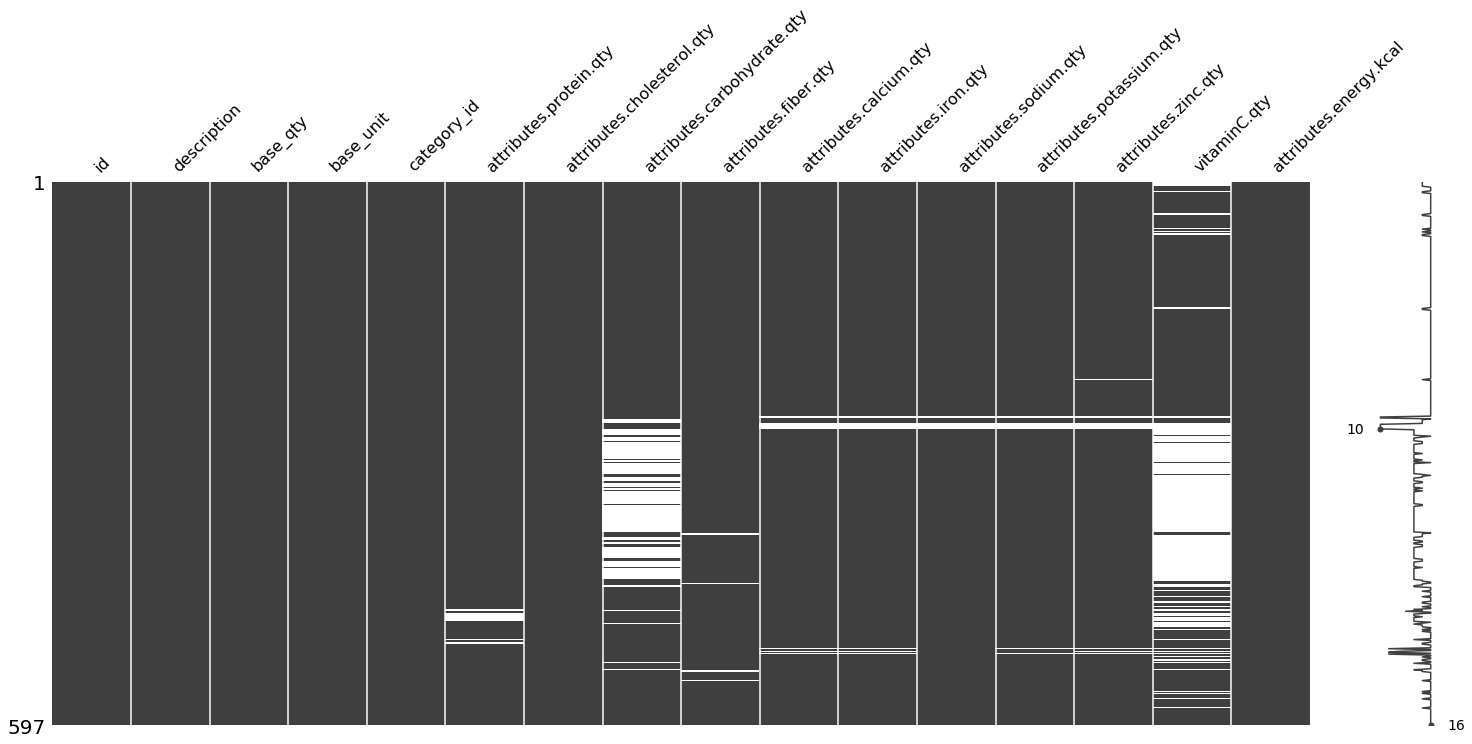

In [22]:
msno.matrix (nutri_kcal)

In [23]:
nutri_kcal['attributes.cholesterol.qty']
# A coluna com informações sobre colesterol não possui dados.

0      NA
1      NA
2      NA
3      NA
4      NA
       ..
592    NA
593    NA
594    NA
595    NA
596    NA
Name: attributes.cholesterol.qty, Length: 597, dtype: object

In [24]:
nutri_kcal['vitaminC.qty']
# A coluna com informações sobre vitamina C possui muitos dados Nan.

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
592       Tr
593       Tr
594    27.69
595     2.18
596       Tr
Name: vitaminC.qty, Length: 597, dtype: object

In [25]:
nutri_kcal = nutri_kcal.drop(columns=['attributes.cholesterol.qty','vitaminC.qty'])

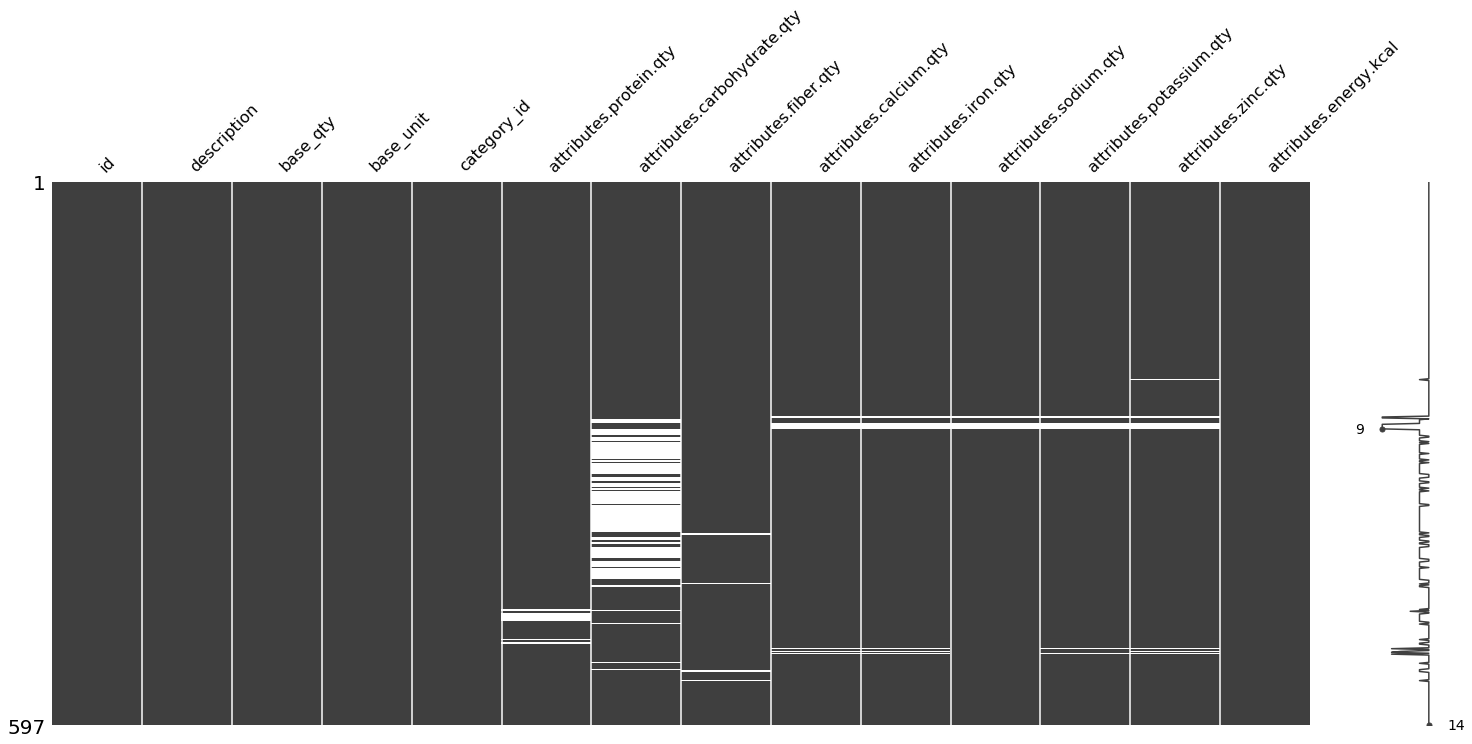

In [26]:
msno.matrix (nutri_kcal)

In [27]:
nutri_kcal.duplicated().sum()
# Consulta se existe algum dado duplicado.

0

In [28]:
nutri_kcal['attributes.protein.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.carbohydrate.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.fiber.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.calcium.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.iron.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.sodium.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.potassium.qty'].fillna(0,inplace=True)
nutri_kcal['attributes.zinc.qty'].fillna(0,inplace=True)
# Inserir o valor 0 nas linhas que contém informações NaN.

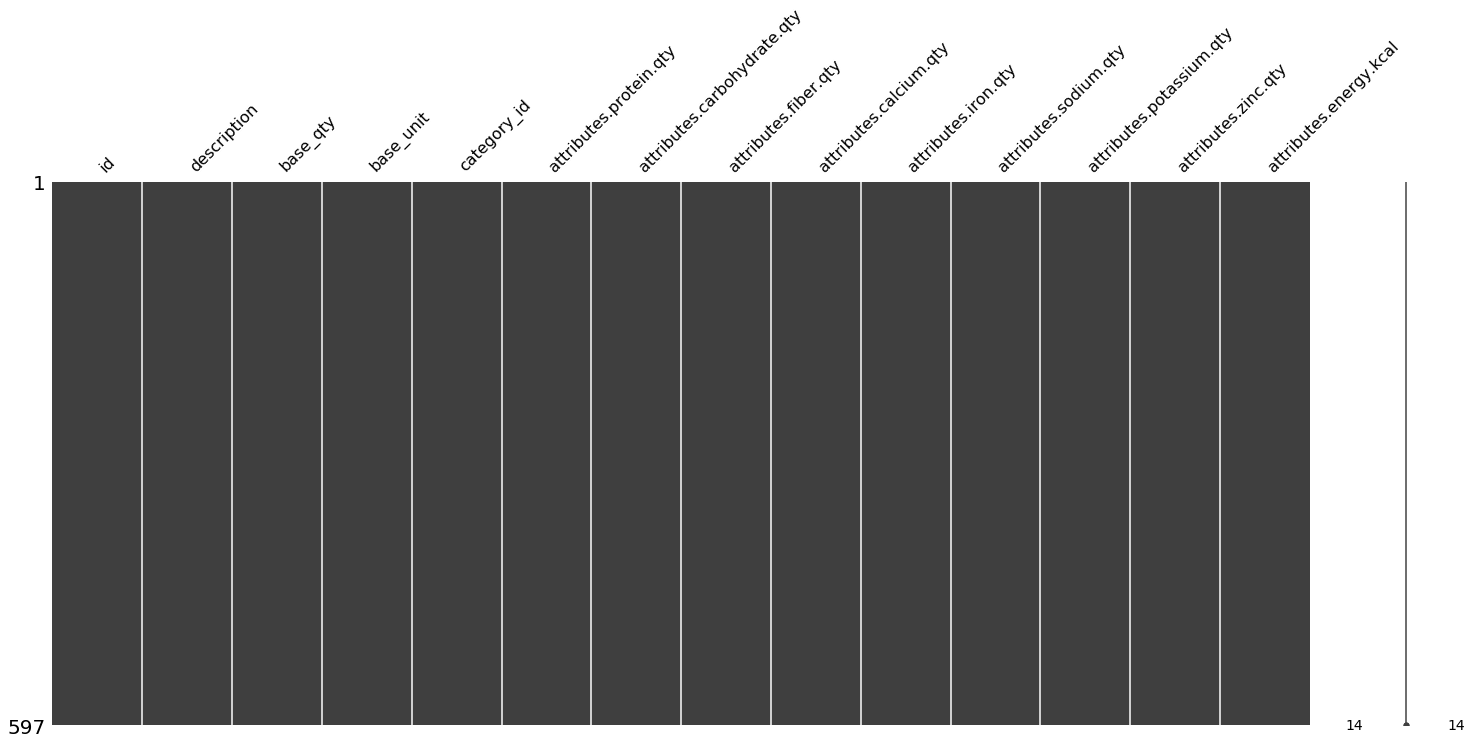

In [29]:
msno.matrix (nutri_kcal)
# Dataset com todos os campos preenchidos.

### Disponibilizar as informações das categorias para complementar as informações do dataset principal:

In [30]:
response = requests.get('https://taco-food-api.herokuapp.com/api/v1/category')
category = pd.DataFrame(response.json())
# Informações das categorias para fazer um merge com o dataset data_taco01

In [31]:
category.head()

,id,category
0,1,Cereais e derivados
1,2,"Verduras, hortaliças e derivados"
2,3,Frutas e derivados
3,4,Gorduras e óleos
4,5,Pescados e frutos do mar


### Efetuar a junção dos dois datasets nutri_kcal e category

In [32]:
nutri_kcal = pd.merge(left=nutri_kcal, right=category, left_on='category_id', right_on ='id')

In [33]:
nutri_kcal

,id_x,description,base_qty,base_unit,category_id,attributes.protein.qty,attributes.carbohydrate.qty,attributes.fiber.qty,attributes.calcium.qty,attributes.iron.qty,attributes.sodium.qty,attributes.potassium.qty,attributes.zinc.qty,attributes.energy.kcal,id_y,category
0,1,"Arroz, integral, cozido",100,g,1,2.58825,25.8098,2.74933,5.204,0.262,1.24467,75.1517,0.682667,123.535,1,Cereais e derivados
1,2,"Arroz, integral, cru",100,g,1,7.32329,77.4507,4.81917,7.818,0.948333,1.64567,173.34,1.39517,359.678,1,Cereais e derivados
2,3,"Arroz, tipo 1, cozido",100,g,1,2.52082,28.0599,1.561,3.54433,0.0766667,1.20067,14.6737,0.491333,128.258,1,Cereais e derivados
3,4,"Arroz, tipo 1, cru",100,g,1,7.15854,78.7595,1.63917,4.41433,0.677747,1.01917,62.4994,1.22483,357.789,1,Cereais e derivados
4,5,"Arroz, tipo 2, cozido",100,g,1,2.56842,28.1926,1.06967,3.33367,0.0503333,1.95967,20.2033,0.549333,130.12,1,Cereais e derivados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,593,"Gergelim, semente",100,g,15,21.1647,21.6177,11.8683,825.446,5.44767,2.575,546.286,5.235,583.547,15,Nozes e sementes
593,594,"Linhaça, semente",100,g,15,14.0839,43.3122,33.5027,211.498,4.697,8.67333,869.287,4.38833,495.096,15,Nozes e sementes
594,595,"Pinhão, cozido",100,g,15,2.98037,43.9176,15.6033,15.7673,0.755333,0.862667,727.006,0.827,174.37,15,Nozes e sementes
595,596,"Pupunha, cozida",100,g,15,2.52292,29.5694,4.25333,27.5863,0.518667,0.908667,303.355,0.291667,218.534,15,Nozes e sementes


In [34]:
nutri_kcal = nutri_kcal.rename(columns={'base_qty':'qty_gr','base_unit':'unit','category_id':'id','attributes.protein.qty':'protein','attributes.carbohydrate.qty':'carbohydrate','attributes.fiber.qty': 'fiber','attributes.calcium.qty':'calcium','attributes.iron.qty':'iron', 'attributes.sodium.qty':'sodium','attributes.potassium.qty':'potassium','attributes.zinc.qty':'zinc','attributes.energy.kcal': 'kcal'})
# Renomear as colunas

In [35]:
nutri_kcal

,id_x,description,qty_gr,unit,id,protein,carbohydrate,fiber,calcium,iron,sodium,potassium,zinc,kcal,id_y,category
0,1,"Arroz, integral, cozido",100,g,1,2.58825,25.8098,2.74933,5.204,0.262,1.24467,75.1517,0.682667,123.535,1,Cereais e derivados
1,2,"Arroz, integral, cru",100,g,1,7.32329,77.4507,4.81917,7.818,0.948333,1.64567,173.34,1.39517,359.678,1,Cereais e derivados
2,3,"Arroz, tipo 1, cozido",100,g,1,2.52082,28.0599,1.561,3.54433,0.0766667,1.20067,14.6737,0.491333,128.258,1,Cereais e derivados
3,4,"Arroz, tipo 1, cru",100,g,1,7.15854,78.7595,1.63917,4.41433,0.677747,1.01917,62.4994,1.22483,357.789,1,Cereais e derivados
4,5,"Arroz, tipo 2, cozido",100,g,1,2.56842,28.1926,1.06967,3.33367,0.0503333,1.95967,20.2033,0.549333,130.12,1,Cereais e derivados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,593,"Gergelim, semente",100,g,15,21.1647,21.6177,11.8683,825.446,5.44767,2.575,546.286,5.235,583.547,15,Nozes e sementes
593,594,"Linhaça, semente",100,g,15,14.0839,43.3122,33.5027,211.498,4.697,8.67333,869.287,4.38833,495.096,15,Nozes e sementes
594,595,"Pinhão, cozido",100,g,15,2.98037,43.9176,15.6033,15.7673,0.755333,0.862667,727.006,0.827,174.37,15,Nozes e sementes
595,596,"Pupunha, cozida",100,g,15,2.52292,29.5694,4.25333,27.5863,0.518667,0.908667,303.355,0.291667,218.534,15,Nozes e sementes


In [36]:
nutri_kcal = nutri_kcal.drop(columns=['id_x','unit','id','id_y'])
# deletar as colunas de ids.

In [37]:
nutri_kcal

,description,qty_gr,protein,carbohydrate,fiber,calcium,iron,sodium,potassium,zinc,kcal,category
0,"Arroz, integral, cozido",100,2.58825,25.8098,2.74933,5.204,0.262,1.24467,75.1517,0.682667,123.535,Cereais e derivados
1,"Arroz, integral, cru",100,7.32329,77.4507,4.81917,7.818,0.948333,1.64567,173.34,1.39517,359.678,Cereais e derivados
2,"Arroz, tipo 1, cozido",100,2.52082,28.0599,1.561,3.54433,0.0766667,1.20067,14.6737,0.491333,128.258,Cereais e derivados
3,"Arroz, tipo 1, cru",100,7.15854,78.7595,1.63917,4.41433,0.677747,1.01917,62.4994,1.22483,357.789,Cereais e derivados
4,"Arroz, tipo 2, cozido",100,2.56842,28.1926,1.06967,3.33367,0.0503333,1.95967,20.2033,0.549333,130.12,Cereais e derivados
...,...,...,...,...,...,...,...,...,...,...,...,...
592,"Gergelim, semente",100,21.1647,21.6177,11.8683,825.446,5.44767,2.575,546.286,5.235,583.547,Nozes e sementes
593,"Linhaça, semente",100,14.0839,43.3122,33.5027,211.498,4.697,8.67333,869.287,4.38833,495.096,Nozes e sementes
594,"Pinhão, cozido",100,2.98037,43.9176,15.6033,15.7673,0.755333,0.862667,727.006,0.827,174.37,Nozes e sementes
595,"Pupunha, cozida",100,2.52292,29.5694,4.25333,27.5863,0.518667,0.908667,303.355,0.291667,218.534,Nozes e sementes


In [38]:
nutri_kcal = nutri_kcal.drop(columns=['protein','carbohydrate','fiber','calcium', 'iron', 'sodium','potassium','zinc'])
# Remover mais colunas que não serão necessárias neste dataset.

In [39]:
nutri_kcal

,description,qty_gr,kcal,category
0,"Arroz, integral, cozido",100,123.535,Cereais e derivados
1,"Arroz, integral, cru",100,359.678,Cereais e derivados
2,"Arroz, tipo 1, cozido",100,128.258,Cereais e derivados
3,"Arroz, tipo 1, cru",100,357.789,Cereais e derivados
4,"Arroz, tipo 2, cozido",100,130.12,Cereais e derivados
...,...,...,...,...
592,"Gergelim, semente",100,583.547,Nozes e sementes
593,"Linhaça, semente",100,495.096,Nozes e sementes
594,"Pinhão, cozido",100,174.37,Nozes e sementes
595,"Pupunha, cozida",100,218.534,Nozes e sementes


In [40]:
nutri_kcal['kcal'].value_counts()
#data_taco05['kcal'].unique()

884                 8
*                   4
NA                  2
218.6751            1
363.077913333333    1
                   ..
495.096113843651    1
151.561856830955    1
100.783043004036    1
397.842506534934    1
486.927086464524    1
Name: kcal, Length: 586, dtype: int64

In [41]:
nutri_kcal.loc[nutri_kcal['kcal']=='NA']
# Consultar as linhas com valores "NA"

,description,qty_gr,kcal,category
515,"Sal, dietético",100,NA,Miscelâneas
516,"Sal, grosso",100,NA,Miscelâneas


In [42]:
nutri_kcal["kcal"].replace({"NA": "0"}, inplace=True)
# Alterar os valores "NA" para 0.

In [43]:
nutri_kcal.loc[nutri_kcal['kcal']=='*']
# Consultar as linhas com valores "*"

,description,qty_gr,kcal,category
449,"Iogurte, sabor abacaxi",100,*,Leite e derivados
456,"Leite, de vaca, desnatado, UHT",100,*,Leite e derivados
457,"Leite, de vaca, integral",100,*,Leite e derivados
590,"Coco, verde, cru",100,*,Nozes e sementes


In [44]:
nutri_kcal["kcal"].replace({"*": "0"}, inplace=True)
# Alterar os valores "NA" para 0.

In [45]:
nutri_kcal['kcal'].value_counts()
#data_taco05['kcal'].unique()

884                 8
0                   6
112.366047826087    1
218.6751            1
363.077913333333    1
                   ..
495.096113843651    1
151.561856830955    1
100.783043004036    1
397.842506534934    1
486.927086464524    1
Name: kcal, Length: 585, dtype: int64

In [46]:
nutri_kcal['kcal'] = nutri_kcal['kcal'].astype(int)
# Alterar a coluna Kcal para mostrar apenas os números inteiros.

In [47]:
nutri_kcal

,description,qty_gr,kcal,category
0,"Arroz, integral, cozido",100,123,Cereais e derivados
1,"Arroz, integral, cru",100,359,Cereais e derivados
2,"Arroz, tipo 1, cozido",100,128,Cereais e derivados
3,"Arroz, tipo 1, cru",100,357,Cereais e derivados
4,"Arroz, tipo 2, cozido",100,130,Cereais e derivados
...,...,...,...,...
592,"Gergelim, semente",100,583,Nozes e sementes
593,"Linhaça, semente",100,495,Nozes e sementes
594,"Pinhão, cozido",100,174,Nozes e sementes
595,"Pupunha, cozida",100,218,Nozes e sementes


In [50]:
nutri_kcal.to_csv ('alimentos.csv', index=False)
# Salvar o dataset nutri_kcal em um arquivo csv, para facilitar futuras consultas.

## Tabela de Atividades Físicas

In [51]:
from bs4 import BeautifulSoup
import json
import requests

In [52]:
url = 'https://marcioatalla.com.br/wp-json/wp/v2/pages/755'
# Importar os dados das atividades físicas e suas calorias.

In [53]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}

In [54]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [55]:
pd.read_html(response.json()['content']['rendered'])[0].dropna()

,0,1
0,Andando de bicicleta,180 a 300/hora
2,Balé,8 kcal/min
4,Basquete,10 kcal/min
6,Beijando,8 kcal/min
8,Beijar e fazer carícias,60 kcal/hora
10,Boxe,11 kcal/min
12,Caminhada,"5,5 kcal/min"
14,Caminhando rápido,520 kcal/hora
16,Caminhar devagar,240 kcal/hora
18,Carregando bebê,141 kcal/hora


In [56]:
atv_kcal =pd.read_html(pd.io.json.json_normalize(response.json())['content.rendered'].values[0])[0].dropna()
# Salvar a tabela no dataset atv_kcal

C:\Users\liare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [57]:
atv_kcal.columns

Int64Index([0, 1], dtype='int64')

In [58]:
atv_kcal = atv_kcal.rename(columns={0:'atv_fisica', 1:'calorias'})
# Renomear as tabelas 0 e 1 do dataset.

In [59]:
atv_kcal.columns

Index(['atv_fisica', 'calorias'], dtype='object')

In [60]:
atv_kcal.shape

(55, 2)

In [61]:
atv_kcal = atv_kcal.drop([6, 8, 14, 16, 18, 24, 28, 30, 34, 36, 38, 40, 42, 46, 48, 50, 52, 54, 56, 78, 80, 88, 90, 102, 104])
# Drop nas linhas que não são consideradas esportes.

In [62]:
atv_kcal

,atv_fisica,calorias
0,Andando de bicicleta,180 a 300/hora
2,Balé,8 kcal/min
4,Basquete,10 kcal/min
10,Boxe,11 kcal/min
12,Caminhada,"5,5 kcal/min"
20,Capoeira,12 kcal/min
22,Ciclismo,6 kcal/min
26,Corrida,10 kcal/min
32,Dança de Salão,"3,5 kcal/min"
44,Esqui aquático,11 kcal/min


In [63]:
atv_kcal.shape

(30, 2)

In [64]:
atv_kcal['atv_fisica'] = atv_kcal['atv_fisica'].replace(['Andando de bicicleta'],'Andar de bicicleta')
atv_kcal['atv_fisica'] = atv_kcal['atv_fisica'].replace(['Jogando vídeo game'],'Jogar vídeo game')
# Renomear algumas atividades para manter o padrão.

In [65]:
atv_kcal

,atv_fisica,calorias
0,Andar de bicicleta,180 a 300/hora
2,Balé,8 kcal/min
4,Basquete,10 kcal/min
10,Boxe,11 kcal/min
12,Caminhada,"5,5 kcal/min"
20,Capoeira,12 kcal/min
22,Ciclismo,6 kcal/min
26,Corrida,10 kcal/min
32,Dança de Salão,"3,5 kcal/min"
44,Esqui aquático,11 kcal/min


In [66]:
atv_kcal['calorias'] = atv_kcal['calorias'].replace(['1000 kcal/hora'],'16,6 kcal/min')
atv_kcal['calorias'] = atv_kcal['calorias'].replace(['180 a 300/hora'],'5 kcal/min')
atv_kcal['calorias'] = atv_kcal['calorias'].replace(['108 kcal/hora'],'1,8 kcal/min')
atv_kcal['calorias'] = atv_kcal['calorias'].replace(['580 kcal/hora'],'8,5 kcal/min')
# transformar os dados das calorias de horas para minutos.

In [67]:
atv_kcal

,atv_fisica,calorias
0,Andar de bicicleta,5 kcal/min
2,Balé,8 kcal/min
4,Basquete,10 kcal/min
10,Boxe,11 kcal/min
12,Caminhada,"5,5 kcal/min"
20,Capoeira,12 kcal/min
22,Ciclismo,6 kcal/min
26,Corrida,10 kcal/min
32,Dança de Salão,"3,5 kcal/min"
44,Esqui aquático,11 kcal/min


In [68]:
atv_kcal.to_csv ('atividades.csv', index=False)

## Cálculo do gasto calórico do corpo em repouso

- O usuário digitará algumas informações pessoais para compor o cálculo do gasto calórico em repouso.

In [25]:
idade = float(input('Qual é a sua idade ?'))

Qual é a sua idade ?41


In [19]:
peso = float(input('Qual é o seu peso ?'))

Qual é o seu peso ?54


In [20]:
altura = float(input('Qual é a sua altura ?'))

Qual é a sua altura ?1.67


In [21]:
sexo = (input('Qual é o seu sexo ?'))

Qual é o seu sexo ?f


In [22]:
print(idade, peso, altura, sexo )

41.0 54.0 1.67 f


### Fórmula do cálculo do gasto calórico em repouso (simples)
1 kcal/k x peso x 24h = 54 kcal/k x 24 horas = 1296 kcal/h

### Fórmula do cálculo do gasto calórico em repouso (composto)
Mulheres
- 10 a 18 anos: 12,2 x peso(kg)+ 746
- 18 a 30 anos: 14,7 x peso(kg)+ 496
- 30 a 60 anos: 8,7 x peso(kg)+ 829
- Acima de 60 anos: 10,5 x peso(kg)+ 596

Homens
- 10 a 18 anos: 17,5 x peso(kg)+ 651
- 18 a 30 anos: 15,3 x peso(kg)+ 679
- 30 a 60 anos: 8,7 x peso(kg)+ 879
- Acima de 60 anos: 13,5 x peso(kg)+ 487

Ex: Mulher de 31 anos, com 1,68m e 69kg sedentária:
8,7x69+829 = 1,429,3

Fonte: Ministério da Saúde


In [ ]:
def repouso(idade, peso, altura, sexo):

    if sexo == 'F':
        if idade >= 10 and idade < 18:
            repouso = 12.2 * peso + 746
        elif idade >= 18 and idade < 30:
            repouso = 14.7 * peso + 496
        elif idade >= 30 and idade < 60:
            repouso = 8.7 * peso + 829
        elif idade >= 60:
            repouso = 10.5 * peso + 596
            
    elif sexo == 'M':
        if idade >= 10 and idade < 18:
            repouso = 17.5 * peso + 651
        elif idade >= 18 and idade < 30:
            repouso = 15.3 * peso + 679
        elif idade >= 30 and idade < 60:
            repouso = 8.7 * peso + 879
        elif idade >= 60:
            repouso = 13.5 * peso + 487
    
    return repouso()

repouso()

In [6]:
#print(repouso)

<function repouso at 0x000001BA94D24318>


## Cálculo das calorias dos alimentos ingeridos

In [ ]:
alimentos = str(input('Qual a categoria dos alimentos que você ingeriu hoje ?'))
# Exemplo no browser.

In [79]:
options = ['Arroz, integral, cozido', 'Arroz, integral, cru',
       'Arroz, tipo 1, cozido', 'Arroz, tipo 1, cru',
       'Arroz, tipo 2, cozido', 'Arroz, tipo 2, cru',
       'Aveia, flocos, crua', 'Biscoito, doce, maisena']
# Exemplo de alimentos selecionados pelo usuário.

In [80]:
mask = nutri_kcal['description'].isin(options)
nutri_kcal.loc[mask, 'kcal'].sum()
# Calcula a soma da quantidade de calorias através dos alimentos selecionados pelo usuário.

2290

## Cálculo das calorias do corpo em repouso x calorias ingeridas no dia

In [ ]:
# Em desenvolvimento

## Sugestão da atividade física de acordo com as calorias excedentes

In [ ]:
# Em desenvolvimento